## TEXT MINNING

- Text mining is the process of exploring and analyzing large amounts of unstructured text data aided by software that can identify concepts, patterns, topics, keywords and other attributes in the data. It's also known as text analytics, although some people draw a distinction between the two terms; in that view, text analytics is an application enabled by the use of text mining techniques to sort through data sets.


- Text mining has become more practical for data scientists and other users due to the development of big data platforms and deep learning algorithms that can analyze massive sets of unstructured data.

- Finding frequency counts of words, length of the sentence, presence/absence of specific words is known as text mining. Natural language processing is one of the components of text minining.

- conda install -c conda-forge textblob

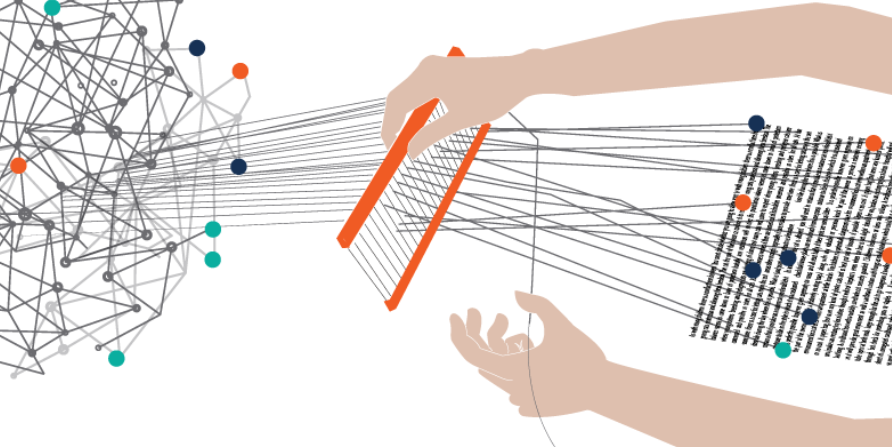

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from textblob import Word ,TextBlob
import pandas as pd
import csv
from os.path import join
import os

In [4]:
##We store data in our current directory directory and retrieve the path using the following command
path = os.getcwd()

In [5]:
msg = pd.read_csv(join(path,"F:\\smsspamcollection\\SMSSpamCollection.csv"),sep='\t', quoting=csv.QUOTE_NONE,
                         names=["label", "message"])

In [6]:
len(msg)

5574

In [7]:
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## For more clearity lets describe our data

In [8]:
msg.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4


## Let us also compute the length of each message and plot the distribution

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


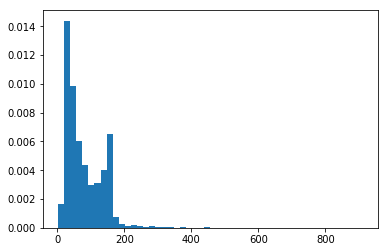

In [9]:
msg['MessageLength'] = [len(x) for x in msg['message'].tolist()]
plt.hist(msg['MessageLength'], bins = 50, normed = True)
plt.xlabel('')
plt.show()

### More statistics about the message length:

In [102]:

msg['MessageLength'].describe()

count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: MessageLength, dtype: float64

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


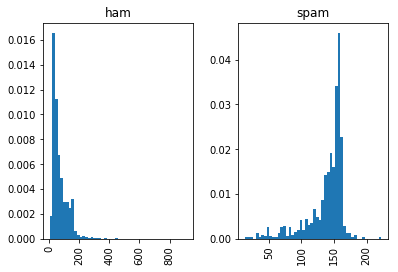

In [10]:
msg.hist(column='MessageLength', by='label', bins=50, normed = True)
plt.show()

## Lemming

- Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words.
- Lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.
- Now we would use textblob package from python to perform some text mining. We convert each message into a set of lemmas i.e. in the canonical form, dictionary form, or citation form.

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
# Lemmatize a word
word = 'Aimy'
w = Word(word)
w.lemmatize()
#> stripe

'Aimy'

In [25]:
sentence = " Hi I am Data Science Trainer"
sent = TextBlob(sentence)
" ". join([w.lemmatize() for w in sent.words])

'Hi I am Data Science Trainer'

In [26]:
def split_into_lemmas(s):
    words = TextBlob(s).words
    return [word.lemma for word in words]
print(split_into_lemmas)

<function split_into_lemmas at 0x00000190E9654378>


In [30]:
msg['message'].apply(split_into_lemmas)[0]

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

## Plotting a nice word cloud

In [31]:
from wordcloud import WordCloud # use the command conda install wordcloud
from wordcloud import STOPWORDS 

In [32]:
words = ' '.join(msg['message'])

In [33]:
## REMOVE URLS & TAGS
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [ ]:
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      max_words=2000,
                      width=1800,
                      height=1400
                     ).generate(no_urls_no_tags)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()